**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

**Reading Dataset**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', delimiter=',',encoding='latin-1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Pre-Processing The Data**

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

**Creating Model**

In [9]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)

**Adding Layers**.

In [10]:
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1.5)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

**Compile The Model**

In [12]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

**Fit The Model**

In [13]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 36s 194ms/step - loss: 0.1745 - accuracy: 0.9483 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 2/15
168/168 [==============================] - 32s 192ms/step - loss: 0.0450 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9868
Epoch 3/15
168/168 [==============================] - 32s 191ms/step - loss: 0.0253 - accuracy: 0.9940 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 4/15
168/168 [==============================] - 32s 193ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0713 - val_accuracy: 0.9844
Epoch 5/15
168/168 [==============================] - 32s 193ms/step - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.0802 - val_accuracy: 0.9821
Epoch 6/15
168/168 [==============================] - 33s 194ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.1080 - val_accuracy: 0.9809
Epoch 7/15
168/168 [==============================] - 32s 192ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.1463 - val_ac

In [15]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Training and Validation ' + string)
  plt.xlabel ('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])

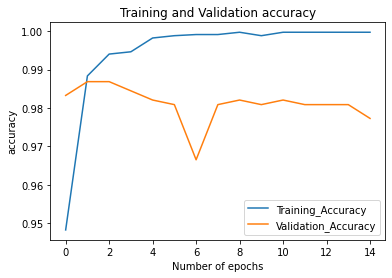

In [16]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

**Save The Model**

In [17]:
model.save('Spam_sms_classifier.h5')

**Test The Model**

In [18]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [19]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 3s 79ms/step - loss: 0.1184 - accuracy: 0.9806


In [20]:
print(' Accuracy : {:0.5f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy : 0.11839
